In [176]:
using Plots
using Random

In [177]:

# Преобразование двоичного числа в десятичное
function binary_to_decimal(binary_array)
    return [sum(binary_array[1] .* 2 .^ (length(binary_array[1])-1:-1:0)), sum(binary_array[2] .* 2 .^ (length(binary_array[2])-1:-1:0))]
end

# Инициализация популяции
function initialize_population(pop_size, chromosome_length)
    return [[rand([0, 1], chromosome_length), rand([0, 1], chromosome_length)] for _ in 1:pop_size]
end

# Оценка приспособленности
function evaluate_fitness(population, objective_function)
    return [objective_function(binary_to_decimal(chromosome)...) for chromosome in population]
end
function select(population, fitness, pop_size)
    sort_fitness = sortperm(fitness)
    return population[sort_fitness][1:pop_size]
end
# Селекция (рулеточный метод)
function selection(population, fitness)
    total_fitness = sum(fitness)
    pick = rand() * total_fitness
    cumulative = 0.0
    for (i, f) in enumerate(fitness)
        cumulative += f
        if cumulative > pick
            return population[i]
        end
    end
    return population[end]
end

# Кроссовер (одноточечный)
function crossover(parent1, parent2)
    point1 = rand(1:length(parent1[1]))
    child11 = vcat(parent1[1][1:point1], parent2[1][point1+1:end])
    child21 = vcat(parent2[1][1:point1], parent1[1][point1+1:end])
    point2 = rand(1:length(parent1[2]))
    child12 = vcat(parent1[2][1:point2], parent2[2][point2+1:end])
    child22 = vcat(parent2[2][1:point2], parent1[2][point2+1:end])
    return [child11, child12], [child21, child22]
end

# Мутация
function mutate(chromosome, mutation_rate)
    for i in 1:length(chromosome[1])
        if rand() < mutation_rate
            chromosome[1][i] = 1 - chromosome[1][i]
        end
    end
    for i in 1:length(chromosome[2])
        if rand() < mutation_rate
            chromosome[2][i] = 1 - chromosome[2][i]
        end
    end
    return chromosome
end

# Генетический алгоритм
function genetic_algorithm(objective_function, pop_size, chromosome_length, generations, mutation_rate)
    population = initialize_population(pop_size, chromosome_length)
    g_chro = binary_to_decimal(population[argmin(evaluate_fitness(population, objective_function))])
    g_min = objective_function(g_chro...)
    hist = [g_chro]
    for generation in 1:generations
        fitness = evaluate_fitness(population, objective_function)
        population = select(population, fitness, pop_size)
        fitness = evaluate_fitness(population, objective_function)
        best_fitness = minimum(fitness)
        println("Generation $generation, Best Fitness: $best_fitness")
        new_population = copy(population)

        for _ in 1:(pop_size÷2)
            parent1 = selection(population, fitness)
            parent2 = selection(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            push!(new_population, mutate(child1, mutation_rate))
            push!(new_population, mutate(child2, mutation_rate))
        end

        best_chromosome = population[argmin(evaluate_fitness(population, objective_function))]
        best_solution = objective_function(binary_to_decimal(best_chromosome)...)
        if best_solution < g_min
            g_min = best_solution
            g_chro = binary_to_decimal(best_chromosome)
        end
        push!(hist, g_chro)
        population = new_population
    end

    return g_min, hist
end



genetic_algorithm (generic function with 1 method)

In [178]:
banan(x, y) = 1*(x^2-y)^2+1*(x-1)^2+0
rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - ((x+420) * sin(sqrt(abs((x+420)))) + (y+420) * sin(sqrt(abs((y+420)))))
xs1 = 0:1:100
ys1 = 0:1:100

0:1:100

In [179]:
pop_size = 5
chromosome_length = 7
generations = 1000
mutation_rate = 0.3

# Запуск генетического алгоритма
best_solution, hist = genetic_algorithm(banan, pop_size, chromosome_length, generations, mutation_rate)
println("Best Solution: ", best_solution)

Generation 1, Best Fitness: 100
Generation 2, Best Fitness: 100
Generation 3, Best Fitness: 100
Generation 4, Best Fitness: 100
Generation 5, Best Fitness: 100
Generation 6, Best Fitness: 100
Generation 7, Best Fitness: 100
Generation 8, Best Fitness: 100
Generation 9, Best Fitness: 100
Generation 10, Best Fitness: 89
Generation 11, Best Fitness: 89
Generation 12, Best Fitness: 89
Generation 13, Best Fitness: 89
Generation 14, Best Fitness: 89
Generation 15, Best Fitness: 89
Generation 16, Best Fitness: 89
Generation 17, Best Fitness: 89
Generation 18, Best Fitness: 89
Generation 19, Best Fitness: 89
Generation 20, Best Fitness: 89
Generation 21, Best Fitness: 89
Generation 22, Best Fitness: 89
Generation 23, Best Fitness: 89
Generation 24, Best Fitness: 89
Generation 25, Best Fitness: 89
Generation 26, Best Fitness: 89
Generation 27, Best Fitness: 89
Generation 28, Best Fitness: 89
Generation 29, Best Fitness: 89
Generation 30, Best Fitness: 89
Generation 31, Best Fitness: 89
Generati

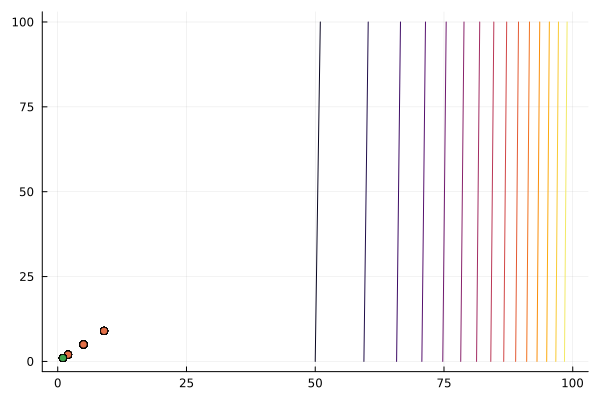

In [180]:
contour(xs1, ys1, banan, legend=false)
scatter!([h[1] for h ∈ hist], [h[1] for h ∈ hist])
scatter!([hist[end][1]], [hist[end][2]])

In [181]:
best_solution, hist = genetic_algorithm(rastrigin, pop_size, chromosome_length, generations, mutation_rate)
println("Best Solution: ", best_solution)

Generation 1, Best Fitness: 793.0
Generation 2, Best Fitness: 793.0
Generation 3, Best Fitness: 793.0
Generation 4, Best Fitness: 793.0
Generation 5, Best Fitness: 793.0
Generation 6, Best Fitness: 169.0
Generation 7, Best Fitness: 169.0
Generation 8, Best Fitness: 169.0
Generation 9, Best Fitness: 169.0
Generation 10, Best Fitness: 169.0
Generation 11, Best Fitness: 169.0
Generation 12, Best Fitness: 130.0
Generation 13, Best Fitness: 97.0
Generation 14, Best Fitness: 97.0
Generation 15, Best Fitness: 97.0
Generation 16, Best Fitness: 97.0
Generation 17, Best Fitness: 97.0
Generation 18, Best Fitness: 97.0
Generation 19, Best Fitness: 97.0
Generation 20, Best Fitness: 97.0
Generation 21, Best Fitness: 97.0
Generation 22, Best Fitness: 97.0
Generation 23, Best Fitness: 97.0
Generation 24, Best Fitness: 97.0
Generation 25, Best Fitness: 97.0
Generation 26, Best Fitness: 72.0
Generation 27, Best Fitness: 72.0
Generation 28, Best Fitness: 72.0
Generation 29, Best Fitness: 72.0
Generation 

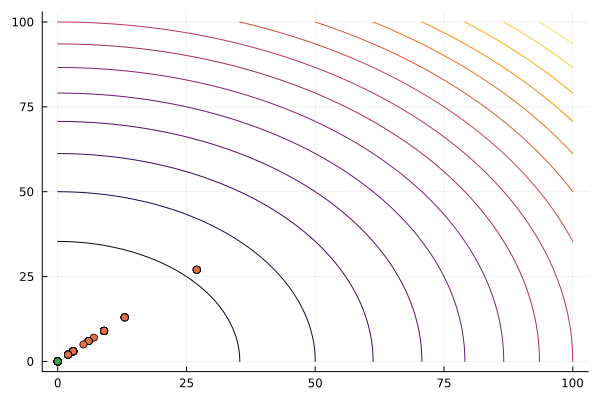

In [182]:
contour(xs1, ys1, rastrigin, legend=false)
scatter!([h[1] for h ∈ hist], [h[1] for h ∈ hist])
scatter!([hist[end][1]], [hist[end][2]])

In [183]:
best_solution, hist = genetic_algorithm(schwefel, pop_size, chromosome_length, generations, mutation_rate)
println("Best Solution: ", best_solution)

Generation 1, Best Fitness: 110.09238799735397
Generation 2, Best Fitness: 110.09238799735397
Generation 3, Best Fitness: 110.09238799735397
Generation 4, Best Fitness: 110.09238799735397
Generation 5, Best Fitness: 85.86760133687676
Generation 6, Best Fitness: 79.44461984502004
Generation 7, Best Fitness: 79.44461984502004
Generation 8, Best Fitness: 79.44461984502004
Generation 9, Best Fitness: 79.44461984502004
Generation 10, Best Fitness: 79.44461984502004
Generation 11, Best Fitness: 27.929614159607127
Generation 12, Best Fitness: 27.929614159607127
Generation 13, Best Fitness: 27.929614159607127
Generation 14, Best Fitness: 27.929614159607127
Generation 15, Best Fitness: 27.929614159607127
Generation 16, Best Fitness: 27.929614159607127
Generation 17, Best Fitness: 27.929614159607127
Generation 18, Best Fitness: 27.929614159607127
Generation 19, Best Fitness: 27.929614159607127
Generation 20, Best Fitness: 27.929614159607127
Generation 21, Best Fitness: 21.414256711110056
Generat

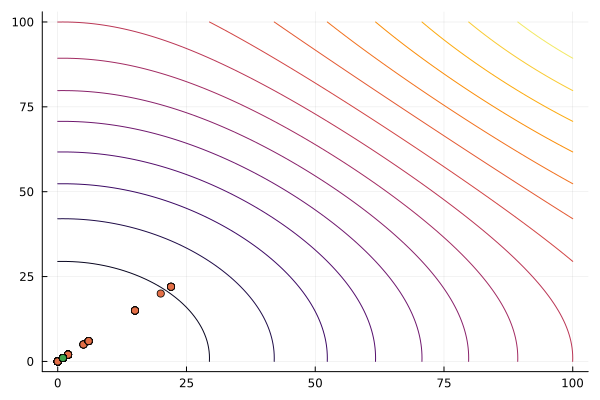

In [184]:
contour(xs1, ys1, schwefel, legend=false)
scatter!([h[1] for h ∈ hist], [h[1] for h ∈ hist])
scatter!([hist[end][1]], [hist[end][2]])